In [2]:
import pandas as pd

df = pd.read_excel("Sample - Superstore.xls")

print(df.head())


   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

In [3]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:

print(df.info())

print(df.isnull().sum())

print(df.describe())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

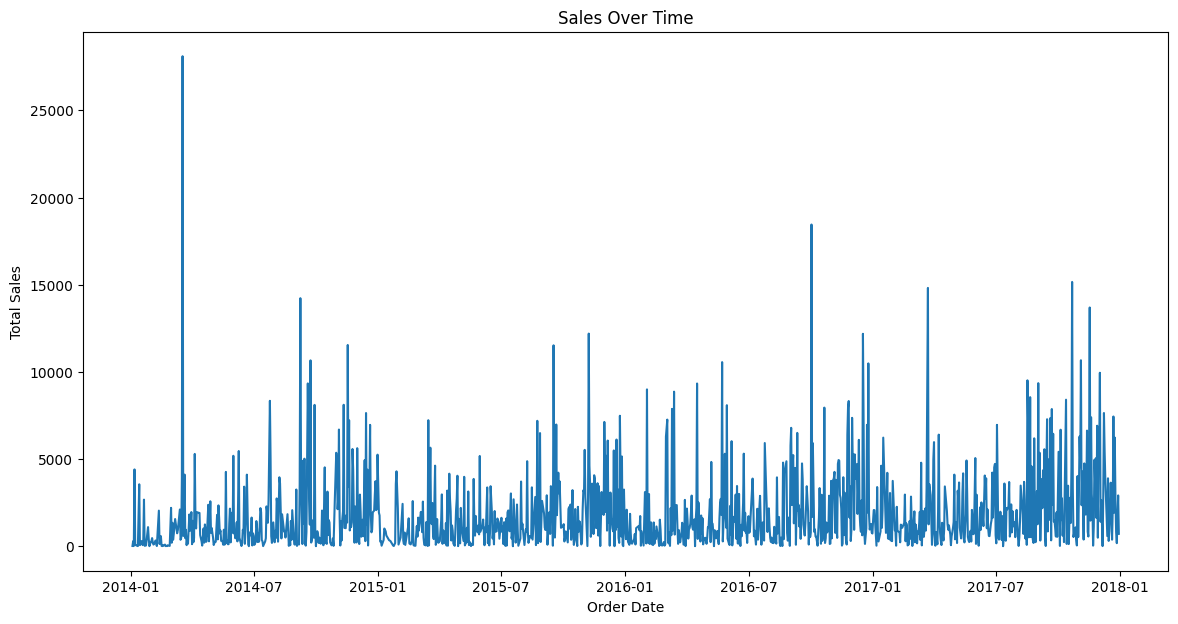

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
df['Order Date'] = pd.to_datetime(df['Order Date'])
sales_over_time = df.groupby('Order Date')['Sales'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x='Order Date', y='Sales', data=sales_over_time)
plt.title('Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.show()


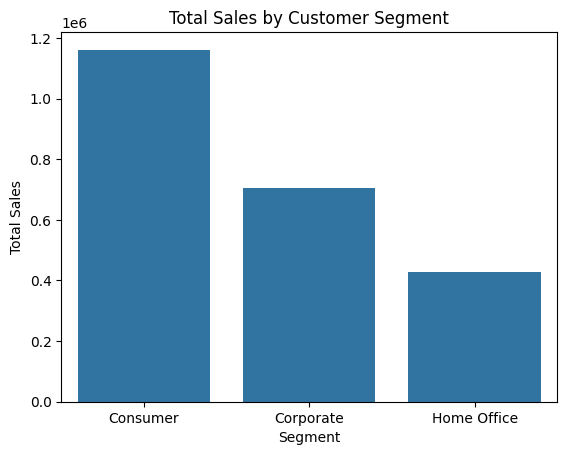

In [6]:
segment_sales = df.groupby('Segment')['Sales'].sum().reset_index()
sns.barplot(x='Segment', y='Sales', data=segment_sales)
plt.title('Total Sales by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.show()


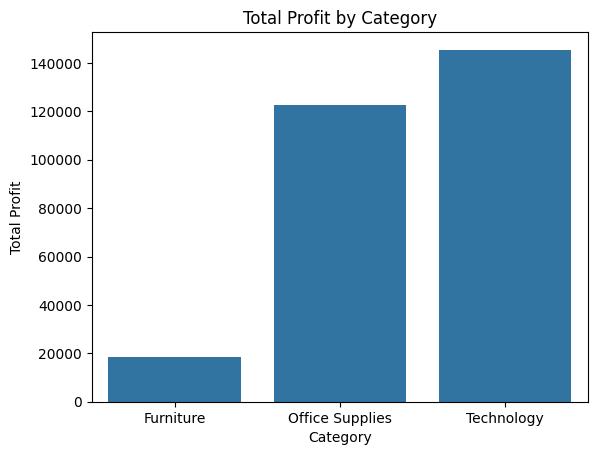

In [7]:
category_profit = df.groupby('Category')['Profit'].sum().reset_index()
sns.barplot(x='Category', y='Profit', data=category_profit)
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.show()


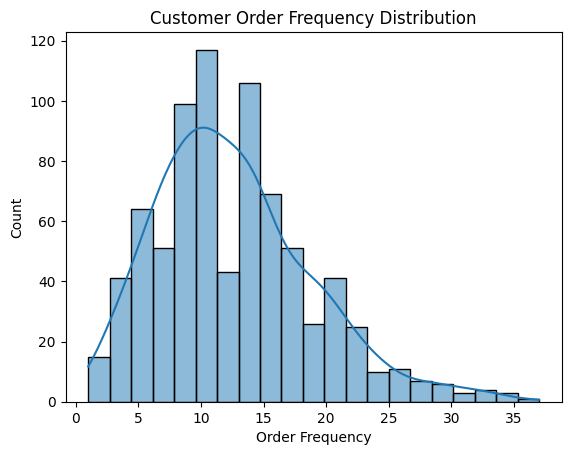

In [8]:
customer_order_freq = df.groupby('Customer ID')['Order ID'].count().reset_index().rename(columns={'Order ID': 'Order Frequency'})
sns.histplot(customer_order_freq['Order Frequency'], kde=True)
plt.title('Customer Order Frequency Distribution')
plt.xlabel('Order Frequency')
plt.show()


In [9]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Aggregate data for RFM analysis
rfm_table = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (df['Order Date'].max() - x.max()).days,
    'Order ID': 'count',
    'Sales': 'sum'
}).reset_index()

# Rename the columns to R, F, M
rfm_table.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

# Display the first few rows of the RFM table
print(rfm_table.head())


  Customer ID  Recency  Frequency  Monetary
0    AA-10315      184         11  5563.560
1    AA-10375       19         15  1056.390
2    AA-10480      259         12  1790.512
3    AA-10645       55         18  5086.935
4    AB-10015      415          6   886.156


In [10]:
# RFM scoring using quartiles
rfm_table['R_score'] = pd.qcut(rfm_table['Recency'], 4, labels=[4, 3, 2, 1])
rfm_table['F_score'] = pd.qcut(rfm_table['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm_table['M_score'] = pd.qcut(rfm_table['Monetary'], 4, labels=[1, 2, 3, 4])

# Combine RFM scores into a single RFM score
rfm_table['RFM_Score'] = rfm_table[['R_score', 'F_score', 'M_score']].sum(axis=1)

# Display the first few rows
print(rfm_table.head())


  Customer ID  Recency  Frequency  Monetary R_score F_score M_score  RFM_Score
0    AA-10315      184         11  5563.560       1       2       4          7
1    AA-10375       19         15  1056.390       4       3       1          8
2    AA-10480      259         12  1790.512       1       2       2          5
3    AA-10645       55         18  5086.935       3       4       4         11
4    AB-10015      415          6   886.156       1       1       1          3


In [11]:
# Define RFM segments
def segment_customer(rfm_score):
    if rfm_score <= 3:
        return 'Churn'
    elif rfm_score <= 6:
        return 'Silver'
    elif rfm_score <= 9:
        return 'Gold'
    else:
        return 'Premium'

rfm_table['Segment'] = rfm_table['RFM_Score'].apply(segment_customer)

# Display the customer segments
print(rfm_table)


    Customer ID  Recency  Frequency  Monetary R_score F_score M_score  \
0      AA-10315      184         11  5563.560       1       2       4   
1      AA-10375       19         15  1056.390       4       3       1   
2      AA-10480      259         12  1790.512       1       2       2   
3      AA-10645       55         18  5086.935       3       4       4   
4      AB-10015      415          6   886.156       1       1       1   
..          ...      ...        ...       ...     ...     ...     ...   
788    XP-21865       43         28  2374.658       3       4       3   
789    YC-21895        4          8  5454.350       4       2       4   
790    YS-21880        9         12  6720.444       4       3       4   
791    ZC-21910       54         31  8025.707       3       4       4   
792    ZD-21925      202          9  1493.944       1       2       2   

     RFM_Score  Segment  
0            7     Gold  
1            8     Gold  
2            5   Silver  
3           11  Pre

<Axes: xlabel='Segment'>

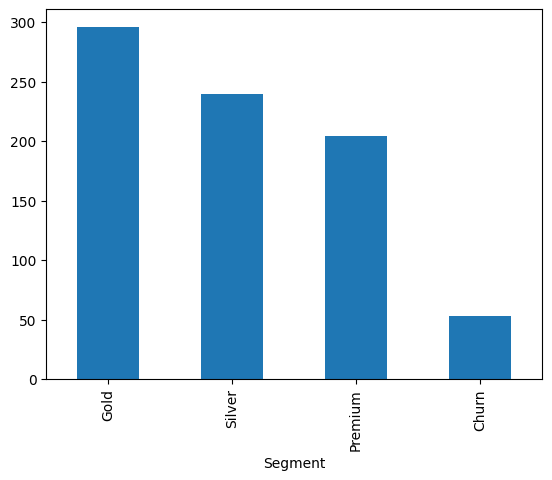

In [12]:
rfm_table['Segment'].value_counts().plot(kind='bar')